# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
# Your code here.

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from scipy import stats

student_data = pd.DataFrame({'StudentID': [1,2,3,4,5,6,7,8,9,10], 'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies' :[10,1,5,9,4,2,9,6,0,3]})
student_data.set_index('StudentID')



,Age,Tardies
StudentID,,
1,17,10
2,51,1
3,27,5
4,21,9
5,36,4
6,48,2
7,19,9
8,26,6
9,54,0


Draw a dispersion diagram (scatter plot) for the data.

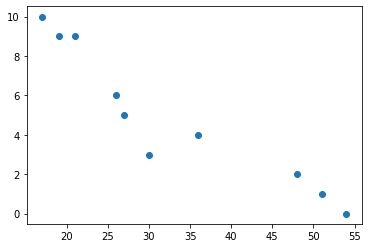

In [2]:
# Your code here.
plt.scatter(student_data['Age'], student_data['Tardies'])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [3]:
# Your response here. 
'''The data seems to suggest that younger students are more often late for class'''

'The data seems to suggest that younger students are more often late for class'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [4]:
# Your response here.
student_data.corr()

,StudentID,Age,Tardies
StudentID,1.000000,0.186190,-0.347113
Age,0.186190,1.000000,-0.939163
Tardies,-0.347113,-0.939163,1.000000


In [5]:
#correlation:  Pearson (linear)
student_data.corr()
correlation1 = np.corrcoef(student_data['Age'],student_data['Tardies'])
print("Correlation = ", correlation1)

#covariance:
covariance1 = np.cov(student_data['Age'],student_data['Tardies'])
print("Covariance = ", covariance1)


'''
For Pearson correlations we know that if the value is  -1 we are a looking at a perfect linear
anti-correlation. In this case the correlation value is of -0.939 
indicating that when one variable (Age) increases the other (Tardies) decreases.

The covariance will describe the direction of the linear correlation and it's value is of -45.566.
'''

Correlation =  [[ 1.         -0.93916269]
 [-0.93916269  1.        ]]
Covariance =  [[187.65555556 -45.56666667]
 [-45.56666667  12.54444444]]


"\nFor Pearson correlations we know that if the value is  -1 we are a looking at a perfect linear\nanti-correlation. In this case the correlation value is of -0.939 \nindicating that when one variable (Age) increases the other (Tardies) decreases.\n\nThe covariance will describe the direction of the linear correlation and it's value is of -45.566.\n"

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
# Your response here.
x = student_data['Age'] #independent variable
y = student_data['Tardies'] #dependent variable
results = stats.linregress(x,y)
results

LinregressResult(slope=-0.2428207709159808, intercept=12.888803363135768, rvalue=-0.9391626886887121, pvalue=5.56665383455343e-05, stderr=0.03139728816158607)

Plot your regression model on your scatter plot.

In [7]:
regression_line = results[1] + results[0]*x
regression_line

0    8.760850
1    0.504944
2    6.332643
3    7.789567
4    4.147256
5    1.233406
6    8.275209
7    6.575463
8   -0.223518
9    5.604180
Name: Age, dtype: float64

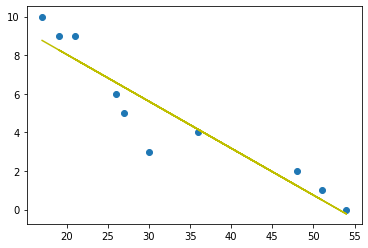

In [8]:
# Your code here.
plt.scatter(student_data['Age'], student_data['Tardies'])
plt.plot(x,regression_line, c= 'y')

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [9]:
# Your response here. 
'''
My model is not very good, I am not confident on the results. 
The regression line is not closely fitted in the 25-35 x axis (Age) values.
My predictions, using this model would not be reliable.
'''

'\nMy model is not very good, I am not confident on the results. \nThe regression line is not closely fitted in the 25-35 x axis (Age) values.\nMy predictions, using this model would not be reliable.\n'

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [10]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [11]:
# Your response here. 
vehicles_correlations = np.corrcoef(vehicles['CO2 Emission Grams/Mile'],[vehicles['Year'],vehicles['Cylinders'],vehicles['Fuel Barrels/Year'],vehicles['Combined MPG'],vehicles['Fuel Cost/Year']])
vehicles_correlations

array([[ 1.        , -0.2222996 ,  0.75239255,  0.98618866, -0.92622904,
         0.93086515],
       [-0.2222996 ,  1.        ,  0.08246886, -0.22108408,  0.20475053,
        -0.0919129 ],
       [ 0.75239255,  0.08246886,  1.        ,  0.73951745, -0.69864786,
         0.77815274],
       [ 0.98618866, -0.22108408,  0.73951745,  1.        , -0.90974268,
         0.91620841],
       [-0.92622904,  0.20475053, -0.69864786, -0.90974268,  1.        ,
        -0.87518476],
       [ 0.93086515, -0.0919129 ,  0.77815274,  0.91620841, -0.87518476,
         1.        ]])

In [12]:
#new dataframe only with the variables we need to then use database.corr and database.corr(method = 'spearman')

vehicles_corr = vehicles[['CO2 Emission Grams/Mile', 'Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG','Fuel Cost/Year' ]].copy()
vehicles_corr                        
                          

,CO2 Emission Grams/Mile,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
0,522.764706,1984,4.0,19.388824,17,1950
1,683.615385,1984,6.0,25.354615,13,2550
2,555.437500,1985,4.0,20.600625,16,2100
3,683.615385,1985,6.0,25.354615,13,2550
4,555.437500,1987,6.0,20.600625,16,2550
...,...,...,...,...,...,...
35947,244.000000,2013,3.0,9.155833,36,1100
35948,243.000000,2014,3.0,9.155833,36,1100
35949,244.000000,2015,3.0,9.155833,36,1100
35950,246.000000,2016,3.0,9.155833,36,1100


In [13]:
#Pearson
pearson = vehicles_corr.corr()
pearson

,CO2 Emission Grams/Mile,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
CO2 Emission Grams/Mile,1.000000,-0.222300,0.752393,0.986189,-0.926229,0.930865
Year,-0.222300,1.000000,0.082469,-0.221084,0.204751,-0.091913
Cylinders,0.752393,0.082469,1.000000,0.739517,-0.698648,0.778153
Fuel Barrels/Year,0.986189,-0.221084,0.739517,1.000000,-0.909743,0.916208
Combined MPG,-0.926229,0.204751,-0.698648,-0.909743,1.000000,-0.875185
Fuel Cost/Year,0.930865,-0.091913,0.778153,0.916208,-0.875185,1.000000


In [14]:
#Spearman
spearman = vehicles_corr.corr(method = 'spearman')
spearman

,CO2 Emission Grams/Mile,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
CO2 Emission Grams/Mile,1.000000,-0.215108,0.788777,0.995539,-0.995258,0.922723
Year,-0.215108,1.000000,0.068727,-0.214857,0.205080,-0.091437
Cylinders,0.788777,0.068727,1.000000,0.784595,-0.783362,0.790481
Fuel Barrels/Year,0.995539,-0.214857,0.784595,1.000000,-0.990364,0.919069
Combined MPG,-0.995258,0.205080,-0.783362,-0.990364,1.000000,-0.926078
Fuel Cost/Year,0.922723,-0.091437,0.790481,0.919069,-0.926078,1.000000


In [15]:
# the variable "Fuel Barrels/Year" is the MOST important when determining CO2 Emission Grams/Mile
# the variable "Year" is the least important


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

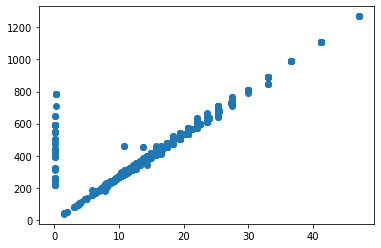

In [16]:
# Your response here. 

#will need to visualise the data, though the correlation results strongly that we can use a linear regression

plt.scatter(vehicles_corr['Fuel Barrels/Year'],vehicles_corr['CO2 Emission Grams/Mile'])

In [17]:
#there is a  Linear correlation with some noise for the Fuel's zero values.
x = vehicles_corr['Fuel Barrels/Year'] #independent variable
y = vehicles_corr['CO2 Emission Grams/Mile'] #dependent variable
results = stats.linregress(x,y)
results

LinregressResult(slope=26.283625397470253, intercept=12.4865208307574, rvalue=0.9861886621428727, pvalue=0.0, stderr=0.02328112378922747)

In [18]:
regression_line = results[1] + results[0]*x # line = intercept + slope*x
regression_line

0        522.095095
1        678.897734
2        553.945631
3        678.897734
4        553.945631
            ...    
35947    253.135014
35948    253.135014
35949    253.135014
35950    253.135014
35951    260.010686
Name: Fuel Barrels/Year, Length: 35952, dtype: float64

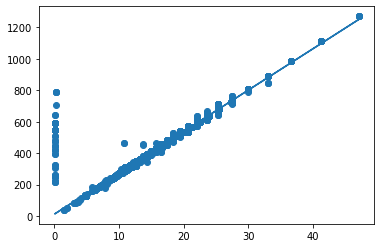

In [19]:
plt.scatter(vehicles_corr['Fuel Barrels/Year'],vehicles_corr['CO2 Emission Grams/Mile'])
plt.plot(x,regression_line)

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [20]:
# Your response here. 
'''
When analysing the CO2 Emission Grams/Mile values, the most related variable was Fuel Barrels/Year for both
Spearman and Pearson correlations, immediatly followed by Combined MPG for Spearman.
There was not a notable discrepancy between the Spearman and Pearson values for any of the variables which
indicated that we could exclude a non-linear model on this first approach.

Though there are some outliars on the 'Fuel Barrels/Year'=0 frame which might indicate that other CO2 emitors
were measured other than the vehicles combustion, I am confident that the regression line below is a strong one
for the Emissions-Fuel relation:

y = 26.283625397470253*x + 12.4865208307574

'''

"\nWhen analysing the CO2 Emission Grams/Mile values, the most related variable was Fuel Barrels/Year for both\nSpearman and Pearson correlations, immediatly followed by Combined MPG for Spearman.\nThere was not a notable discrepancy between the Spearman and Pearson values for any of the variables which\nindicated that we could exclude a non-linear model on this first approach.\n\nThough there are some outliars on the 'Fuel Barrels/Year'=0 frame which might indicate that other CO2 emitors\nwere measured other than the vehicles combustion, I am confident that the regression line below is a strong one\nfor the Emissions-Fuel relation:\n\ny = 26.283625397470253*x + 12.4865208307574\n\n"

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [21]:
# Your code here.
inv_att_dict = {'invited' : [1,3,4,6,8,9,11,14], 'attended' : [1,2,4,4,5,7,8,13]}

parties= pd.DataFrame(inv_att_dict)
parties

,invited,attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

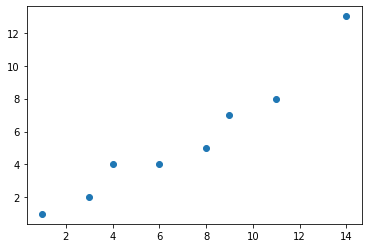

In [22]:
# Your code here.
plt.scatter(parties['invited'], parties['attended'])


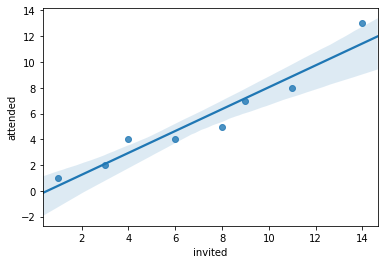

In [23]:
#trying not to do the same as the previous exercise: https://seaborn.pydata.org/tutorial/regression.html
sb.regplot(parties['invited'],parties['attended'])

In [24]:
x2 = parties['invited']
y2 = parties['attended']
results2 = stats.linregress(x2,y2)
results2


LinregressResult(slope=0.8484848484848485, intercept=-0.43939393939393945, rvalue=0.9652303546573691, pvalue=0.00010236374464090686, stderr=0.09380896778286217)

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 
'''
This plot shows a positive correlation between the two variables. Using this seaborn feature we can identify
values that stray from the linear regression line more easily: they will be outside of line's "mist". 
The rvalue tells us the QUALITY of our relation  where 1 is the best and 0 the worst - in this case 
the rvalue is 0.96 which indicates our linear regression is quite strong.
'''


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [76]:
# Your response here. 
#try and use the std deviation to see which outlier is most proeminent 
#loc 
#np.where

In [25]:
print('Mean:', np.mean(parties))
print('Standard Deviation:', np.std(parties))
#makes sense to use just the 'attended' set


Mean: invited     7.0
attended    5.5
dtype: float64
Standard Deviation: invited     4.062019
attended    3.570714
dtype: float64


In [47]:

#will use the z-score (mean and std deviation) as these articles suggest
#https://medium.com/datadriveninvestor/finding-outliers-in-dataset-using-python-efc3fce6ce32
#https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba


z = np.abs(stats.zscore(parties))
print(z)

[[1.47709789 1.26025208]
 [0.98473193 0.98019606]
 [0.73854895 0.42008403]
 [0.24618298 0.42008403]
 [0.24618298 0.14002801]
 [0.49236596 0.42008403]
 [0.98473193 0.70014004]
 [1.72328087 2.10042013]]


In [54]:
#the hight z score seems to be 2.10 so I will locate the index for that value
print(np.where(z >= 2.1))

(array([7]), array([1]))


In [55]:
#will remove that point from that dataframe
parties_no_outlier = parties.drop(parties.index[7])
parties_no_outlier

,invited,attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


In [56]:
#new regression
x3 = parties_no_outlier['invited']
y3 = parties_no_outlier['attended']
results3 = stats.linregress(x3,y3)
results3
#the rvalue increased from 0.9652303546573691

LinregressResult(slope=0.6842105263157895, intercept=0.32330827067669166, rvalue=0.971278116825086, pvalue=0.0002644056885656864, stderr=0.07496206665031292)

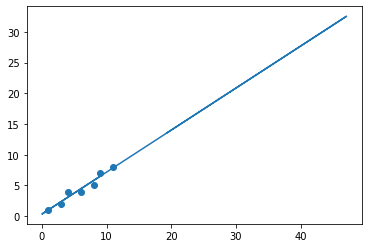

In [57]:
plt.scatter(parties_no_outlier['invited'], parties_no_outlier['attended'])
regression_line2 = results3[1] + results3[0]*x 
regression_line2
plt.plot(x,regression_line2)

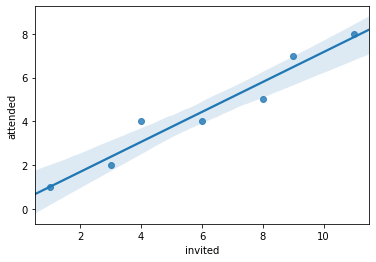

In [58]:
sb.regplot(parties_no_outlier['invited'],parties_no_outlier['attended'])

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
'''the rvalue increased from 0.9652303546573691 to 0.971278116825086 which indicates our model is a bit more
accurate. The slope and y intercept were also adjusted'''
